In [1]:
#ElhamMirzaei2
#Import the necessary modules for plotting
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#reading our data
df=pd.read_csv(r'HousePrice.csv')
#show first 5 rows of our data
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
#describing the dataframe
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
#finding information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 119.0+ KB


In [5]:
#finding the shape of the dataframe
df.shape

(3479, 8)

In [6]:
#data cleaning
df.duplicated(subset = ['Address']).sum()

3286

In [7]:
#number of unique Addresses
df.Address.nunique()

192

In [8]:
#finding the missing values(we have null Address)
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
#Remove the null values (houses without Address)
cdf = df.dropna()
print(cdf.to_string())

                  Area  Room  Parking  Warehouse  Elevator                        Address         Price  Price(USD)
0                   63     1     True       True      True                        Shahran  1.850000e+09    61666.67
1                   60     1     True       True      True                        Shahran  1.850000e+09    61666.67
2                   79     2     True       True      True                         Pardis  5.500000e+08    18333.33
3                   95     2     True       True      True                  Shahrake Qods  9.025000e+08    30083.33
4                  123     2     True       True      True                 Shahrake Gharb  7.000000e+09   233333.33
5                   70     2     True       True     False     North Program Organization  2.050000e+09    68333.33
6                   87     2     True       True      True                         Pardis  6.000000e+08    20000.00
7                   59     1     True       True      True              

In [10]:
#finding the missing values in the new dataframe(now we have not any null)
cdf.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

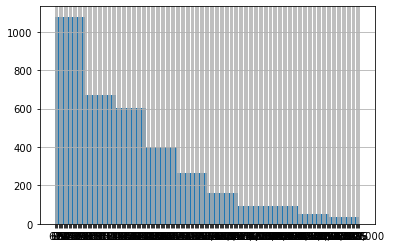

In [11]:
#bar plot visualization
viz = (cdf.Area)
viz.hist()
plt.show()

In [12]:
#remove outliers of Area(less than 40 & more than 400)
cdf.loc[:, 'Area'] = pd.to_numeric(cdf['Area'], errors='coerce')
cdf.loc[:, 'Area'] = cdf.loc[:, 'Area'].apply(lambda x: x if (x >= 40 and x <= 400) else np.nan)
cdf = cdf.dropna(subset=['Area'])

C:\Users\emirz\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


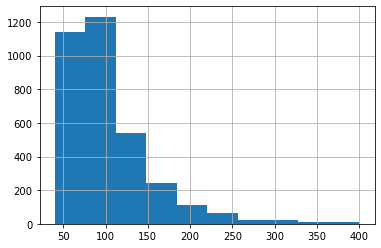

In [13]:
#bar plot visualization
viz = (cdf.Area)
viz.hist()
plt.show()

In [14]:
cdf.rename(columns = {'Price(USD)':'PriceUSD'}, inplace = True)
list(cdf)

['Area',
 'Room',
 'Parking',
 'Warehouse',
 'Elevator',
 'Address',
 'Price',
 'PriceUSD']

In [15]:
#show x&y columns
cdf = cdf[['Area' , 'Room' , 'Address' , 'PriceUSD']]
cdf.head()

,Area,Room,Address,PriceUSD
0,63.0,1,Shahran,61666.67
1,60.0,1,Shahran,61666.67
2,79.0,2,Pardis,18333.33
3,95.0,2,Shahrake Qods,30083.33
4,123.0,2,Shahrake Gharb,233333.33


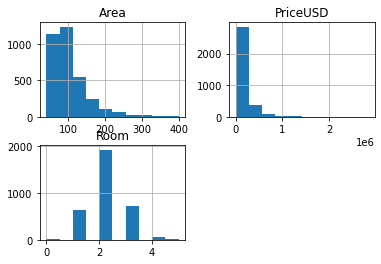

In [16]:
#bar plot visualization
viz = cdf[['Area' , 'Room' , 'Address' , 'PriceUSD']]
viz.hist()
plt.show()

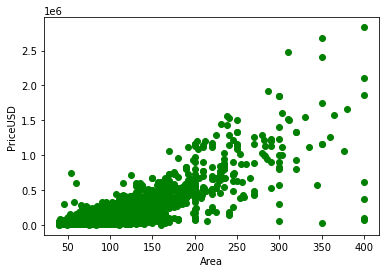

In [17]:
#Best Scatter plot
plt.scatter(cdf.Area , cdf.PriceUSD , color='green')
plt.xlabel("Area")
plt.ylabel("PriceUSD")
plt.show()

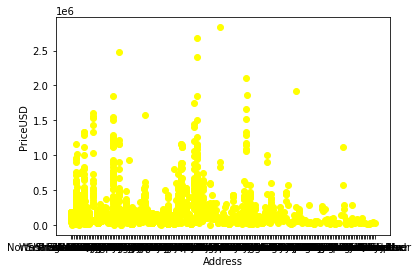

In [18]:
#Good Scatter plot
plt.scatter(cdf.Address , cdf.PriceUSD , color='yellow')
plt.xlabel("Address")
plt.ylabel("PriceUSD")
plt.show()

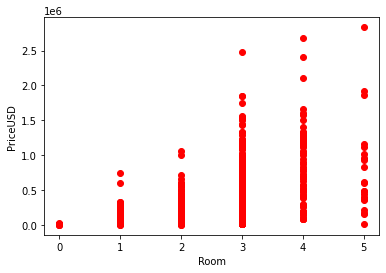

In [19]:
#Worst Scatter plot
plt.scatter(cdf.Room , cdf.PriceUSD , color='red')
plt.xlabel("Room")
plt.ylabel("PriceUSD")
plt.show()

In [20]:
#train=80% & test=20%
msk = np.random.rand(len(cdf)) <= 0.8
train = cdf[msk]
test = cdf[~msk]

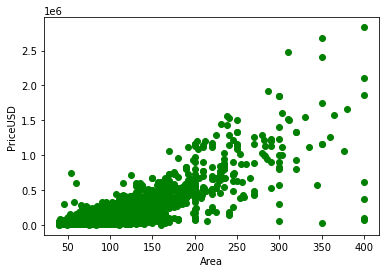

In [21]:
#Best Scatter plot
plt.scatter(cdf.Area , cdf.PriceUSD , color='green')
plt.xlabel("Area")
plt.ylabel("PriceUSD")
plt.show()

In [22]:
#calculate the Coefficient & Intercept (ax+b)
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['PriceUSD']])
regr.fit(train_x , train_y)
print('Coefficient: ' , regr.coef_)
print('Intercept: ' , regr.intercept_)

Coefficient:  [[3696.85372908]]
Intercept:  [-209418.8020146]


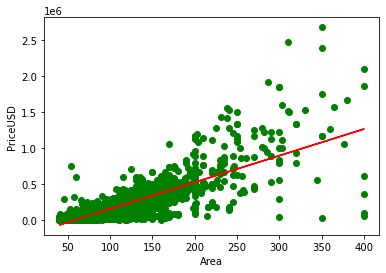

In [23]:
#Best Scatter plot with Linear Regression
plt.scatter(train.Area , train.PriceUSD , color='green')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] , '-r')
plt.xlabel("Area")
plt.ylabel("PriceUSD")
plt.show()

In [24]:
#calculate the r2_score
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['PriceUSD']])
test_y_ = regr.predict(test_x)
print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("MSE: %.2f" % np.mean(np.absolute(test_y_ - test_y)**2))
print("R2_SCORE: %.2f" % r2_score(test_y_ , test_y))

MAE: 72403.57
MSE: 14856103372.82
R2_SCORE: 0.47


In [25]:
#calculate correlation between all numeric columns*
cdf.corr()

,Area,Room,PriceUSD
Area,1.000000,0.783973,0.803188
Room,0.783973,1.000000,0.570516
PriceUSD,0.803188,0.570516,1.000000


In [26]:
#calculate correlation between two desired columns*
cdf['Room'].corr(cdf['PriceUSD'])

0.5705164889146449